# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?



**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

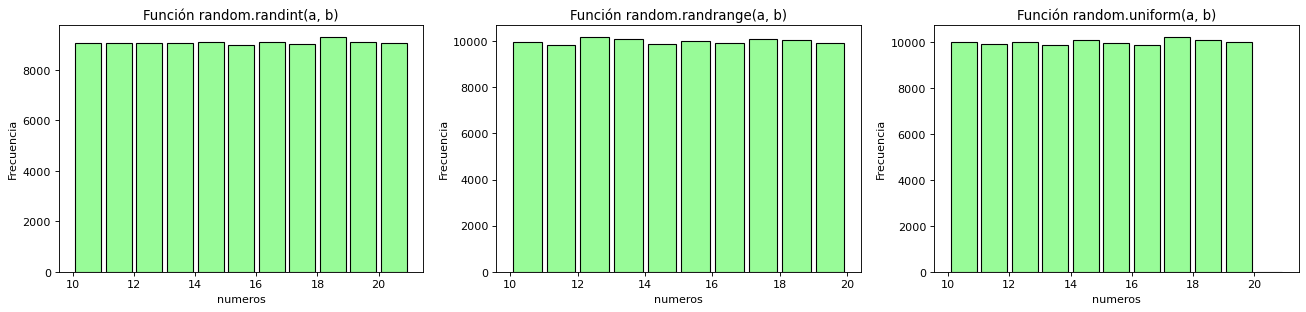

In [22]:
a,b = 10,20
x1=[]
x2=[]
x3=[]
intervalos = range(a,b+2)
for i in range (1,100000):
    x1.append(random.randint(a,b))
    x2.append(random.randrange(a, b))
    x3.append(random.uniform(a, b))
        
fig, ax = plt.subplots(1, 3, figsize=(20, 4), dpi=80)

ax[0].hist(x1, bins=intervalos, rwidth=0.85, color = 'palegreen',edgecolor = 'black')
ax[0].set_title('Función random.randint(a, b)')
ax[0].set(xlabel='numeros', ylabel='Frecuencia')

ax[1].hist(x2, bins=range(min(x2), max(x2) + 2), rwidth=0.85,color='palegreen',edgecolor = 'black')
ax[1].set_title('Función random.randrange(a, b)',)
ax[1].set(xlabel='numeros', ylabel='Frecuencia')

ax[2].hist(x3, bins=intervalos, rwidth=0.85, color='palegreen',edgecolor = 'black')
ax[2].set_title('Función random.uniform(a, b)')
ax[2].set(xlabel='numeros', ylabel='Frecuencia')

random.uniform(a, b)
plt.show()

* La función random.randint(a,b), devuelve un entero aleatorio en el rango [a, b], ambos incluidos. a debe ser inferior o igual a b.

* La función random.randrange(a, b), genera numeros pseudoaleatorios. Genera un número entero entre los valores generados por range a y b, pero sin incluir el b.

* La función random.uniform(a,b) devuelve un número aleatorio en el rango [a, b] extraído de una distribución uniforme. Genera un número decimal entre a y b (puede generar a, debido a la forma de redondear de Python, puede que genere b o no).



### Clase NotSoRandom:

In [ ]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg